<a href="https://colab.research.google.com/github/SidhKartikDash/Stock_prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0334
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.3180e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 3.8147e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.6621e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.5337e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 6.0895e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.5690e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.7301e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.2624e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.1240e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 3.0094e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.9000e-04
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.9815e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.7171e-04
Epoch 15/20
56/56 

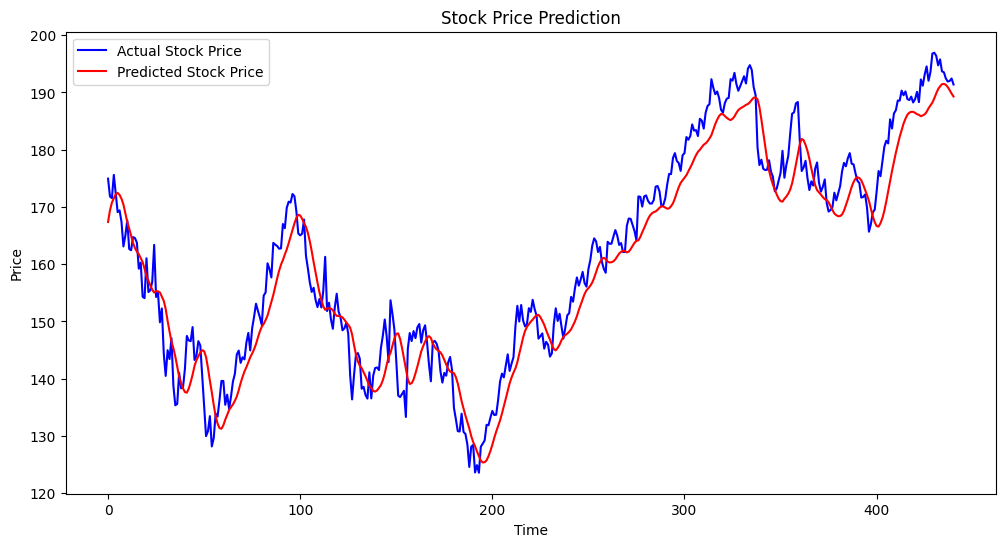

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Download stock data
def load_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data['Close'].values.reshape(-1, 1), data

#  Preprocess data
def preprocess_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x, y = [], []
    for i in range(time_step, len(scaled_data)):
        x.append(scaled_data[i-time_step:i])
        y.append(scaled_data[i])

    x, y = np.array(x), np.array(y)
    return x, y, scaler

#  Build LSTM model
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#  Plot predictions
def plot_predictions(actual, predicted):
    plt.figure(figsize=(12,6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


stock = 'AAPL'  # Change this to your desired stock (e.g., 'TSLA', 'GOOG', etc.)
start_date = '2015-01-01'
end_date = '2024-01-01'

raw_data, full_data = load_data(stock, start_date, end_date)
x, y, scaler = preprocess_data(raw_data)

# Train-test split
split = int(len(x) * 0.8)
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# Model
model = build_model((x_train.shape[1], 1))
model.fit(x_train, y_train, epochs=20, batch_size=32)

# Predictions
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plot_predictions(y_actual, predicted)
